In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
#superman.jfif
import cv2

def detect_people(image_path):
    # 載入Haar Cascade分類器
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # 讀取圖片
    image = cv2.imread(image_path)
    
    # 將圖片轉換為灰階
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 偵測人臉
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # 計算偵測到的人數
    num_people = len(faces)
    return num_people

# 指定圖片檔案路徑
image_path = 'superman.jfif'
# 呼叫函式並印出結果
num_people = detect_people(image_path)
print("圖片中有", num_people, "個人")

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def count_people_in_subway(image_path):
    # 使用OpenCV讀取圖片
    image = cv2.imread(image_path)
    
    # 載入深度學習模型
    model_file = 'deploy.prototxt'
    weight_file = 'mobilenet_iter_73000.caffemodel'
    net = cv2.dnn.readNetFromCaffe(model_file, weight_file)

    # 執行人體偵測
    blob = cv2.dnn.blobFromImage(image, 0.007843, (300, 300), 127.5)
    net.setInput(blob)
    detections = net.forward()

    # 繪製人體偵測結果和計算人數
    num_people = 0
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.2:  # 設定一個信心閾值，只顯示信心高於0.2的偵測結果
            num_people += 1
            box = detections[0, 0, i, 3:7] * np.array([image.shape[1], image.shape[0], image.shape[1], image.shape[0]])
            (startX, startY, endX, endY) = box.astype("int")
            cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)

    # 顯示偵測結果和人數
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Total People: {num_people}")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    image_path = "people7.jfif"  # 替換成您的捷運車廂圖片路徑
    count_people_in_subway(image_path)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def count_people_in_subway(image_path):
    # 載入YOLO模型
    net = cv2.dnn.readNet("yolov3.cfg", "yolov3.weights")

    # 載入分類標籤
    with open("coco.names", "r") as f:
        classes = f.read().strip().split("\n")
    
    # 使用YOLOv3模型的預設輸入大小(416x416)
    input_width, input_height = 416, 416

    # 使用OpenCV讀取圖片
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    # 進行圖片預處理，縮放成模型的輸入大小
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (input_width, input_height), swapRB=True, crop=False)

    # 設定模型的輸入
    net.setInput(blob)

    # 取得YOLOv3模型的輸出層
    out_layer_names = net.getUnconnectedOutLayersNames()
    detections = net.forward(out_layer_names)

    # 繪製人體偵測結果和計算人數
    num_people = 0
    for detection in detections:
        for obj in detection:
            scores = obj[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.9:  # 設定一個信心閾值，只顯示信心高於0.2的偵測結果
                num_people += 1
                center_x, center_y, w, h = (obj[0:4] * np.array([width, height, width, height])).astype("int")
                x, y = int(center_x - w/2), int(center_y - h/2)
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                label = f"{classes[class_id]}: {confidence:.2f}"
                cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # 顯示偵測結果和人數
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Total People: {num_people}")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    image_path = "people2.jfif"  # 替換成您的捷運車廂圖片路徑
    count_people_in_subway(image_path)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

net = cv2.dnn.readNet("yolov3.cfg", "yolov3.weights")

# 載入分類標籤
with open("coco.names", "r") as f:
    classes = f.read().strip().split("\n")

# 載入照片
img = cv2.imread("S__19259418_0.jpg")
height, width, _ = img.shape

# 將照片轉換成 YOLO 可以處理的格式
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

# 設定 YOLO 輸入層
net.setInput(blob)

# 獲得檢測結果
outs = net.forward(net.getUnconnectedOutLayersNames())

# 解析檢測結果
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:  # 可調整閾值
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# 非最大抑制
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# 畫出結果
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = classes[class_ids[i]]
        confidence = confidences[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, f'{label} {confidence:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# 顯示結果
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

net = cv2.dnn.readNet("yolov3.cfg", "yolov3.weights")

# 載入分類標籤
with open("coco.names", "r") as f:
    classes = f.read().strip().split("\n")

# 載入照片
img = cv2.imread("pexels-muhammadtaha-ibrahim-2293506.jpg")
height, width, _ = img.shape

# 將照片轉換成 YOLO 可以處理的格式
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

# 設定 YOLO 輸入層
net.setInput(blob)

# 獲得檢測結果
outs = net.forward(net.getUnconnectedOutLayersNames())

# 解析檢測結果
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.1 and classes[class_id] == 'person':  # 可調整閾值，並確保類別為 'person'
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# 非最大抑制
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.9)

# 計算偵測到的人數
num_people = len(indexes)

# 畫出結果
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = classes[class_ids[i]]
        confidence = confidences[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, f'{label} {confidence:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# 顯示結果
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 顯示偵測到的人數
print(f"偵測到的人數： {num_people}")


In [ ]:
!pip install opencv-python-headless --user

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 載入 YOLO 模型
net = cv2.dnn.readNet("yolov3.cfg", "yolov3.weights")

# 載入分類標籤
with open("coco.names", "r") as f:
    classes = f.read().strip().split("\n")

# 載入照片
img = cv2.imread("")
height, width, _ = img.shape

# 將照片轉換成 YOLO 可以處理的格式
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

# 設定 YOLO 輸入層
net.setInput(blob)

# 獲得檢測結果
outs = net.forward(net.getUnconnectedOutLayersNames())

# 解析檢測結果
boxes = []
confidences = []
class_ids = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:  # 可調整閾值
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# 非最大抑制
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# 畫出結果
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = classes[class_ids[i]]
        confidence = confidences[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, f'{label} {confidence:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# 顯示結果
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 計算檢測到的人數
num_people = sum(1 for i in range(len(boxes)) if i in indexes and classes[class_ids[i]] == 'person')
print(f"檢測到 {num_people} 人")


In [ ]:
import torch

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img = "real_carriage_46.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc
results.show()
results.pandas().xyxy[0]

In [ ]:
import torch

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img = "real_carriage_46.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Filtered Results
filtered_results = []

# Define filtering criteria
class_to_ignore = "PEOPLE"
min_box_width = 50  # 設定最小寬度閾值（像素）

# Iterate over detection results
for det in results.xyxy[0]:  # xyxy contains [x_min, y_min, x_max, y_max, confidence, class]
    class_name = det[5]  # 類別名稱
    box_width = det[2] - det[0]  # 邊界框寬度

    # 根據條件過濾結果
    if class_name != class_to_ignore or box_width >= min_box_width:
        filtered_results.append(det)

# 將過濾後的結果轉換為tensor
filtered_results = torch.stack([torch.tensor(det) for det in filtered_results])

# 打印過濾後的結果
print("過濾後的結果：")
print(filtered_results)

# 顯示過濾後的結果
filtered_results.print()  # 使用print()顯示結果
filtered_results.show()   # 使用show()顯示結果


In [ ]:
import torch
import matplotlib.pyplot as plt
from PIL import Image

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img = "real_carriage_46.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Filtered Results
filtered_results = []

# Define filtering criteria
class_to_ignore = "PEOPLE"
min_box_width = 50  # 設定最小寬度閾值（像素）

# Iterate over detection results
for det in results.xyxy[0]:  # xyxy contains [x_min, y_min, x_max, y_max, confidence, class]
    class_name = det[5]  # 類別名稱
    box_width = det[2] - det[0]  # 邊界框寬度

    # 根據條件過濾結果
    if class_name != class_to_ignore or box_width >= min_box_width:
        filtered_results.append(det)

# 將過濾後的結果轉換為tensor
filtered_results = torch.stack([torch.tensor(det) for det in filtered_results])

# 打印過濾後的結果
print("過濾後的結果：")
print(filtered_results)

# 顯示原始圖像
original_img = Image.open(img)
plt.imshow(original_img)
plt.axis('off')
plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt
from PIL import Image

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img = "people7.jfif"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Filtered Results
filtered_results = []

# Define filtering criteria
class_to_ignore = "PEOPLE"
min_box_width = 20  # 設定最小寬度閾值（像素）

# Iterate over detection results
for det in results.xyxy[0]:  # xyxy contains [x_min, y_min, x_max, y_max, confidence, class]
    class_name = det[5]  # 類別名稱
    box_width = det[2] - det[0]  # 邊界框寬度

    # 根據條件過濾結果
    if class_name != class_to_ignore or box_width >= min_box_width:
        filtered_results.append(det)

# 將過濾後的結果轉換為tensor
filtered_results = torch.stack([torch.tensor(det) for det in filtered_results])

# 打印過濾後的結果
print("過濾後的結果：")
print(filtered_results)

# 顯示原始圖像
original_img = Image.open(img)

# 顯示圖片和標籤
results.show()
plt.imshow(original_img)
plt.axis('off')
plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt
from PIL import Image

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img = "real_carriage_46.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Filtered Results
filtered_results = []

# Define filtering criteria
class_to_ignore = "PEOPLE"
min_box_width = 20  # 設定最小寬度閾值（像素）

# Iterate over detection results
for det in results.xyxy[0]:  # xyxy contains [x_min, y_min, x_max, y_max, confidence, class]
    class_name = det[5]  # 類別名稱
    box_width = det[2] - det[0]  # 邊界框寬度

    # 根據條件過濾結果
    if class_name != class_to_ignore or box_width >= min_box_width:
        filtered_results.append(det)

# 將過濾後的結果轉換為tensor
filtered_results = torch.stack([torch.tensor(det) for det in filtered_results])

# 顯示原始圖像
original_img = Image.open(img)
plt.imshow(original_img)
plt.axis('off')
plt.show()

# 顯示過濾後的結果（使用Matplotlib）
for det in filtered_results:
    x_min, y_min, x_max, y_max, confidence, class_id = det.tolist()
    class_name = model.names[int(class_id)]
    plt.rectangle((x_min, y_min), (x_max, y_max), label=f"{class_name}: {confidence:.2f}")
plt.legend()
plt.show()

In [ ]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img = "real_carriage_46.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Filtered Results
filtered_results = []

# Define filtering criteria
class_to_ignore = "PEOPLE"
min_box_width = 20  # 設定最小寬度閾值（像素）

# Iterate over detection results
for det in results.xyxy[0]:  # xyxy contains [x_min, y_min, x_max, y_max, confidence, class]
    class_name = det[5]  # 類別名稱
    box_width = det[2] - det[0]  # 邊界框寬度

    # 根據條件過濾結果
    if class_name != class_to_ignore or box_width >= min_box_width:
        filtered_results.append(det)

# 將過濾後的結果轉換為tensor
filtered_results = torch.stack([torch.tensor(det) for det in filtered_results])

# 顯示原始圖像
original_img = Image.open(img)
plt.imshow(original_img)
plt.axis('off')
plt.show()

# 顯示過濾後的結果（使用Matplotlib）
for det in filtered_results:
    x_min, y_min, x_max, y_max, confidence, class_id = det.tolist()
    class_name = model.names[int(class_id)]
    
    # 建立矩形
    rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor='r', facecolor='none')
    
    # 將矩形添加到圖像上
    plt.gca().add_patch(rect)
    
    # 標註類別和信心分數
    plt.text(x_min, y_min, f"{class_name}: {confidence:.2f}", color='r', backgroundcolor='w')

plt.show()

In [ ]:
import sys
# 添加模块的绝对路径到 sys.path
sys.path.append('C:/Users/acer/yolov5-master/yolov5-master/models')
sys.path.append('C:/Users/acer/yolov5-master/yolov5-master')  # 添加存储库根目录
sys.path.append('C:/Users/acer/yolov5-master/yolov5-master/yolov5')  # 添加存储库根目录中的 yolov5 文件夹

# 现在导入 attempt_load 函数
from experimental import attempt_load
import torch
from PIL import Image
from yolov5.utils.general import non_max_suppression
from yolov5.utils.torch_utils import select_device

# 載入Yolov5模型
weights_path = 'yolov5s.pt'  # 替換為您的權重文件路徑
device = select_device('')
model = attempt_load(weights_path, map_location=device)
model.eval()

# 讀取圖片
image_path = 'real_carriage_46.jpg'  # 替換為您的圖片路徑
img = Image.open(image_path).convert('RGB')

# 檢測物體
img_tensor = torch.from_numpy(img).unsqueeze(0).to(device)  # 轉換圖片為張量
results = model(img_tensor)
results = non_max_suppression(results, conf_thres=0.5, iou_thres=0.4)

# 計算人數
num_people = 0
for pred in results[0]:
    if pred is not None and pred[5] == 0:  # 0表示人類類別
        num_people += 1

# 顯示結果
print(f'當節車廂人數：{num_people}')

# 顯示圖片（不框出忽略的人）
if results[0] is not None:
    for det in results[0]:
        if det is not None and det[5] == 0:
            img.show()
            break

In [1]:
import sys
import torch
from PIL import Image
from yolov5.utils.torch_utils import select_device
from yolov5.utils.general import non_max_suppression
from models.experimental import attempt_load

# 文件路径
weights_path = 'yolov5s.pt'
image_path = './img/real_carriage_46.jpg'

# 添加模块的绝对路径到 sys.path
sys.path.append('C:/Users/acer/yolov5-master/yolov5-master')
sys.path.append('C:/Users/acer/yolov5-master/yolov5-master/yolov5')

# 载入Yolov5模型
device = select_device('')
model = attempt_load(weights_path, map_location=device)
model.eval()

# 读取图片
img = Image.open(image_path).convert('RGB')

# 检测物体
img_tensor = torch.from_numpy(img).unsqueeze(0).to(device)  # 转换图片为张量
results = model(img_tensor)
results = non_max_suppression(results, conf_thres=0.5, iou_thres=0.4)

# 计算人数
num_people = 0
for pred in results[0]:
    if pred is not None and pred[5] == 0:  # 0表示人类类别
        num_people += 1

# 显示结果
print(f'车厢内人数：{num_people}')

# 显示图片（不框出忽略的人）
if results[0] is not None:
    for det in results[0]:
        if det is not None and det[5] == 0:
            img.show()
            break


ModuleNotFoundError: No module named 'yolov5'

In [6]:
import sys
import os

# 添加存储库的根目录到 sys.path
repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # 返回上级目录
sys.path.append(repo_root)

In [19]:
import sys
import torch
from PIL import Image
from yolov5.utils.torch_utils import select_device
from yolov5.utils.general import non_max_suppression
from models.experimental import attempt_load

# 文件路径
weights_path = 'yolov5s.pt'
image_path = './img/real_carriage_46.jpg'

# 添加模块的绝对路径到 sys.path
sys.path.append(os.getcwd())

# 载入Yolov5模型
device = select_device('')
model = attempt_load(weights_path, map_location=device)
model.eval()

# 读取图片
img = Image.open(image_path).convert('RGB')

# 检测物体
img_tensor = torch.from_numpy(img).unsqueeze(0).to(device)  # 转换图片为张量
results = model(img_tensor)
results = non_max_suppression(results, conf_thres=0.5, iou_thres=0.4)

# 计算人数
num_people = 0
for pred in results[0]:
    if pred is not None and pred[5] == 0:  # 0表示人类类别
        num_people += 1

# 显示结果
print(f'车厢内人数：{num_people}')

# 显示图片（不框出忽略的人）
if results[0] is not None:
    for det in results[0]:
        if det is not None and det[5] == 0:
            img.show()
            break


ModuleNotFoundError: No module named 'yolov5'

['C:\\Users\\acer\\yolov5-master\\yolov5-master',
 'C:\\ProgramData\\Anaconda3\\python39.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\Users\\acer\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.9.egg',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\acer\\.ipython']

In [18]:
import sys
import torch
from PIL import Image
from C:/Users/acer/yolov5-master/yolov5-master/utils/torch_utils import select_device
from C:/Users/acer/yolov5-master/yolov5-master/utils/general import non_max_suppression
from C:/Users/acer/yolov5-master/yolov5-master/models/experimental import attempt_load

# 文件路径
weights_path = 'yolov5s.pt'
image_path = './img/real_carriage_46.jpg'

# 载入Yolov5模型
device = select_device('')
model = attempt_load(weights_path, map_location=device)
model.eval()

# 读取图片
img = Image.open(image_path).convert('RGB')

# 检测物体
img_tensor = torch.from_numpy(img).unsqueeze(0).to(device)  # 转换图片为张量
results = model(img_tensor)
results = non_max_suppression(results, conf_thres=0.5, iou_thres=0.4)

# 计算人数
num_people = 0
for pred in results[0]:
    if pred is not None and pred[5] == 0:  # 0表示人类类别
        num_people += 1

# 显示结果
print(f'车厢内人数：{num_people}')

# 显示图片（不框出忽略的人）
if results[0] is not None:
    for det in results[0]:
        if det is not None and det[5] == 0:
            img.show()
            break


SyntaxError: invalid syntax (Temp/ipykernel_25268/529355805.py, line 4)

In [12]:
import os
print(os.getcwd())  # 打印当前工作目录

C:\Users\acer\yolov5-master\yolov5-master


In [13]:
import sys
sys.path.append('C:/Users/acer/yolov5-master/yolov5-master')  # 替换成你的存储库根目录的绝对路径


In [14]:
import sys
print(sys.path)


['C:\\Users\\acer\\yolov5-master\\yolov5-master', 'C:\\ProgramData\\Anaconda3\\python39.zip', 'C:\\ProgramData\\Anaconda3\\DLLs', 'C:\\ProgramData\\Anaconda3\\lib', 'C:\\ProgramData\\Anaconda3', '', 'C:\\Users\\acer\\AppData\\Roaming\\Python\\Python39\\site-packages', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.9.egg', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\acer\\.ipython', 'C:\\Users\\acer\\yolov5-master', 'C:/Users/acer/yolov5-master/yolov5-master']


In [48]:
#圖片比例是不是怪怪的
import sys
import torch
from PIL import Image, ImageDraw, ImageFont
from torchvision import transforms
from utils.torch_utils import select_device
from utils.general import non_max_suppression
from models.experimental import attempt_load

# 文件路径
weights_path = 'yolov5s.pt'
image_path = './img/real_carriage_46.jpg'

# 载入Yolov5模型
device = select_device('cpu')  # 指定在CPU上运行
model = attempt_load(weights_path)
model.eval()

# 读取图片
img = Image.open(image_path).convert('RGB')

# 调整图片大小以匹配模型的输入大小（例如，YOLOv5s 的输入大小为640x640）
input_size = (640, 640)
img = img.resize(input_size)

# 检测物体
img_tensor = torch.unsqueeze(transforms.ToTensor()(img), 0).to(device)  # 转换图片为张量
results = model(img_tensor)
results = non_max_suppression(results, conf_thres=0.2, iou_thres=0.4)

# 计算人数
num_people = 0

# 绘制边界框
if results[0] is not None:
    draw = ImageDraw.Draw(img)
    for det in results[0]:
        if det is not None and det[5] == 0:  # 0表示人类类别
            num_people += 1
            bbox = det[0:4].tolist()  # 提取边界框坐标
            draw.rectangle(bbox, outline="red", width=3)  # 绘制边界框
            draw.text((bbox[0], bbox[1]), f'Person {num_people}', fill="red")  # 在边界框上标注人数

# 显示结果
print(f'車廂內人數：{num_people}')
img.show()


YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients


車廂內人數：13


Using cache found in C:\Users\acer/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 1.
YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 1108x1478 10 persons, 3 handbags, 1 cell phone
Speed: 122.3ms pre-process, 644.0ms inference, 4.0ms NMS per image at shape (1, 3, 480, 640)


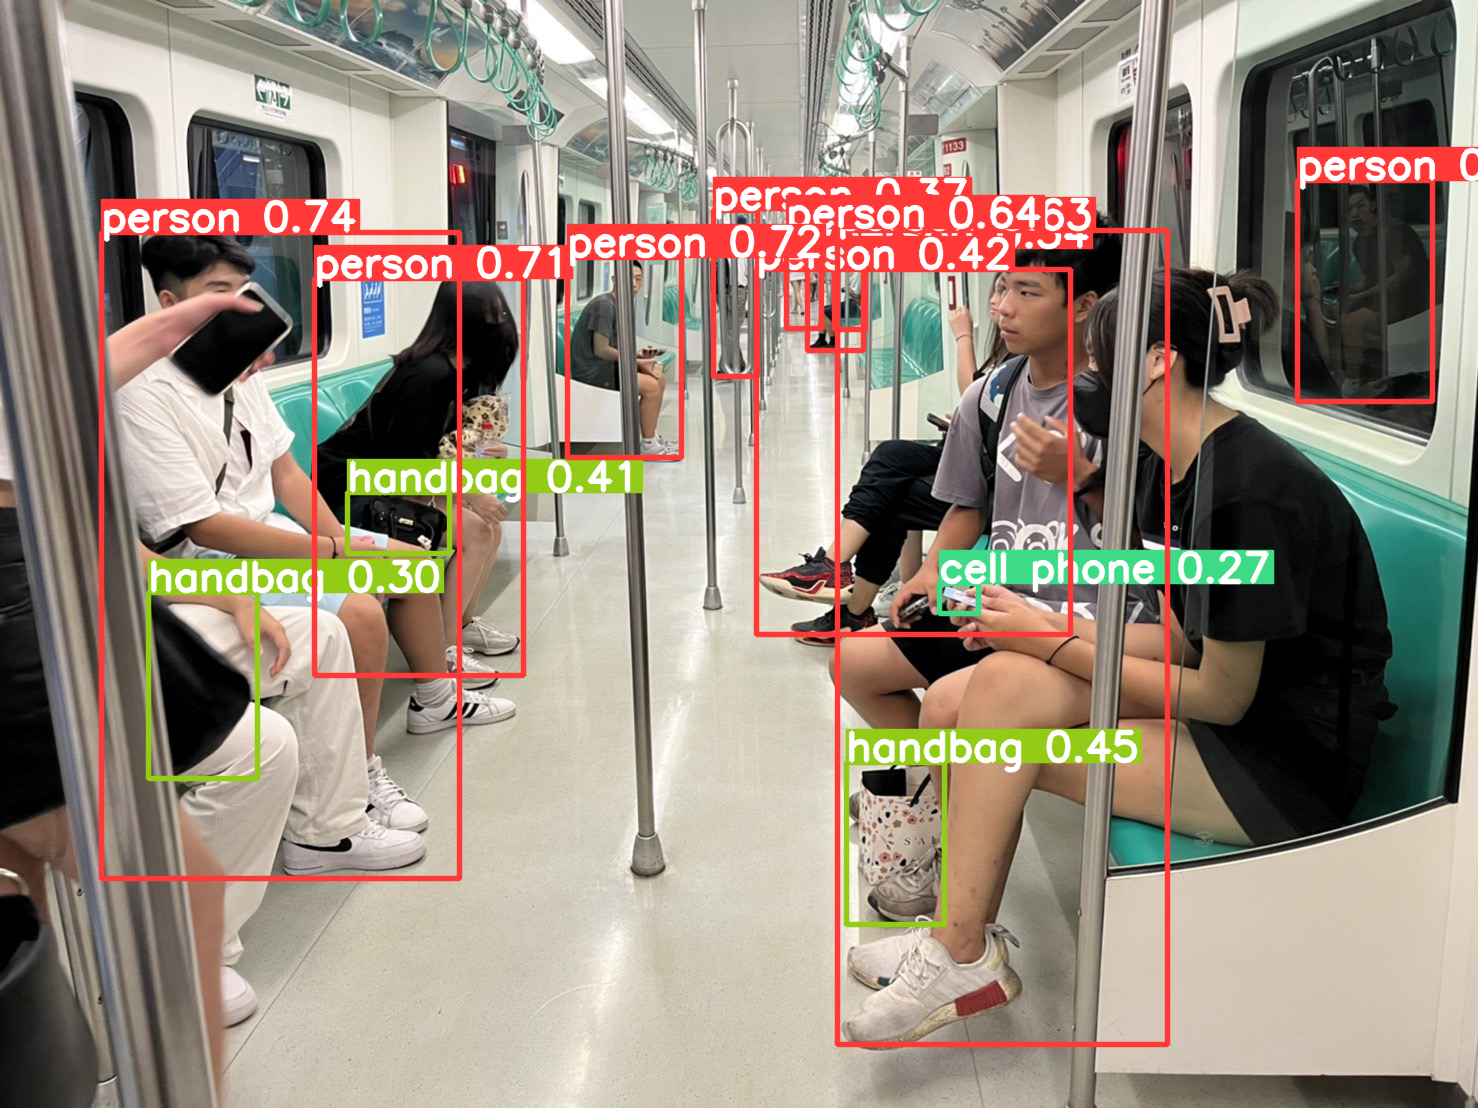

In [39]:
import torch

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img = "./img/real_carriage_0.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc
results.show()


In [62]:
import torch
from PIL import Image, ImageDraw, ImageFont
import random

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img_path = "./img/real_carriage_46.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img_path)

# Load the image using PIL
img = Image.open(img_path)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc

# Adjust the drawing parameters
draw = ImageDraw.Draw(img)
line_width = 4  # Modify this to change the border thickness
font_size = 17  # Modify this to change the font size

# Define a dictionary to map class indices to random colors
class_colors = {}
for class_index in range(len(results.names)):
    class_colors[class_index] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# Iterate through the detected objects and draw bounding boxes
for det in results.pred[0]:
    if det is not None and det[4] > 0.2:  # Filter detections by confidence threshold
        class_index = int(det[5])  # Extract the class index
        if class_index in class_colors:
            bbox = det[0:4].tolist()
            draw.rectangle(bbox, outline=class_colors[class_index], width=line_width)
            font = ImageFont.truetype("arial.ttf", font_size)  # You may need to specify the path to your font file
            class_label = results.names[class_index]  # Use class name from the results
            draw.text((bbox[0], bbox[1]), f'{class_label}', fill=class_colors[class_index], font=font)

# Show the modified image
img.show()


Using cache found in C:\Users\acer/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 1.
YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 1108x1478 14 persons, 1 bench, 1 backpack, 3 handbags, 2 suitcases, 1 tv, 1 cell phone
Speed: 86.8ms pre-process, 438.0ms inference, 4.0ms NMS per image at shape (1, 3, 480, 640)


In [61]:
import torch
from PIL import Image, ImageDraw, ImageFont
import random

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img_path = "./img/real_carriage_46.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img_path)

# Load the image using PIL
img = Image.open(img_path)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc

# Adjust the drawing parameters
draw = ImageDraw.Draw(img)
line_width = 2  # Modify this to change the border thickness
font_size = 16  # Modify this to change the font size
max_bbox_width = 100  # Modify this to set the maximum allowed bbox width for nearby objects

# Define a dictionary to map class indices to random colors
class_colors = {}
for class_index in range(len(results.names)):
    class_colors[class_index] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# Iterate through the detected objects and draw bounding boxes
for det in results.pred[0]:
    if det is not None and det[4] > 0.2:  # Filter detections by confidence threshold
        bbox = det[0:4].tolist()
        bbox_width = bbox[2] - bbox[0]  # Calculate the width of the bbox
        if bbox_width <= max_bbox_width:  # Check if the width is within the allowed range
            class_index = int(det[5])  # Extract the class index
            if class_index in class_colors:
                draw.rectangle(bbox, outline=class_colors[class_index], width=line_width)
                font = ImageFont.truetype("arial.ttf", font_size)  # You may need to specify the path to your font file
                class_label = results.names[class_index]  # Use class name from the results
                draw.text((bbox[0], bbox[1]), f'{class_label}', fill=class_colors[class_index], font=font)

# Show the modified image
img.show()


Using cache found in C:\Users\acer/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 1.
YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 1108x1478 14 persons, 1 bench, 1 backpack, 3 handbags, 2 suitcases, 1 tv, 1 cell phone
Speed: 51.8ms pre-process, 337.3ms inference, 4.0ms NMS per image at shape (1, 3, 480, 640)


In [16]:
import torch
from PIL import Image, ImageDraw, ImageFont
import random

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img_path = "./img/S__17752252_0.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img_path)

# Load the image using PIL
img = Image.open(img_path)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc

# Adjust the drawing parameters
draw = ImageDraw.Draw(img)
line_width = 3  # Modify this to change the border thickness
font_size = 20  # Modify this to change the font size

# Define a dictionary to map class indices to random colors
class_colors = {}
for class_index in range(len(results.names)):
    class_colors[class_index] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# Define a minimum width and minimum height threshold to filter out small objects
min_width_threshold = 30  # Adjust this value based on your needs
min_height_threshold = 30  # Adjust this value based on your needs

# Iterate through the detected objects and draw bounding boxes
for det in results.pred[0]:
    if det is not None and det[4] > 0.2:  # Filter detections by confidence threshold
        class_index = int(det[5])  # Extract the class index
        if class_index in class_colors:
            bbox = det[0:4].tolist()
            bbox_width = bbox[2] - bbox[0]
            bbox_height = bbox[3] - bbox[1]
            
            # Filter out objects that are too small or too far (based on width and height thresholds)
            if bbox_width >= min_width_threshold and bbox_height >= min_height_threshold:
                draw.rectangle(bbox, outline=class_colors[class_index], width=line_width)
                font = ImageFont.truetype("arial.ttf", font_size)  # You may need to specify the path to your font file
                class_label = results.names[class_index]  # Use class name from the results
                confidence = round(float(det[4]), 2)  # Extract confidence and round it to 2 decimal places
                text = f'{class_label} ({confidence})'  # Include confidence in the label
                draw.text((bbox[0], bbox[1]), text, fill=class_colors[class_index], font=font)

# Show the modified image
img.show()
results.pandas().xyxy[0]

Using cache found in C:\Users\acer/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 1.
YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 1108x1478 17 persons, 4 handbags
Speed: 35.9ms pre-process, 295.1ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


,xmin,ymin,xmax,ymax,confidence,class,name
0,331.296509,442.761444,497.661438,781.804382,0.761034,0,person
1,183.502686,530.520264,462.961182,909.873779,0.721837,0,person
2,675.322693,583.910156,945.284180,1108.000000,0.667698,0,person
3,870.262817,726.571106,1204.173096,1107.369873,0.658266,0,person
4,796.338013,369.524048,909.015381,605.966980,0.584074,0,person
5,917.563477,533.836548,1091.758301,735.849487,0.573173,0,person
6,0.677218,714.654663,219.761612,1108.000000,0.564214,0,person
7,1242.317261,511.608276,1477.159058,877.196167,0.528902,0,person
8,897.311584,380.527954,991.366455,615.528259,0.511199,0,person
9,700.170044,300.731354,807.611511,524.156616,0.474757,0,person


In [11]:
import torch
from PIL import Image, ImageDraw, ImageFont
import random

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img_path = "./img/S__17752252_0.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img_path)

# Load the image using PIL
img = Image.open(img_path)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc

# Adjust the drawing parameters
draw = ImageDraw.Draw(img)
line_width = 2  # Modify this to change the border thickness
font_size = 16  # Modify this to change the font size

# Define a dictionary to map class indices to random colors
class_colors = {}
for class_index in range(len(results.names)):
    class_colors[class_index] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# Define a minimum width and minimum height threshold to filter out small objects
min_width_threshold = 30  # Adjust this value based on your needs
min_height_threshold = 30  # Adjust this value based on your needs

# Iterate through the detected objects and draw bounding boxes
for det in results.pred[0]:
    if det is not None and det[4] > 0.2:  # Filter detections by confidence threshold
        class_index = int(det[5])  # Extract the class index
        if class_index in class_colors:
            bbox = det[0:4].tolist()
            bbox_width = bbox[2] - bbox[0]
            bbox_height = bbox[3] - bbox[1]
            
            # Filter out objects that are too small or too far (based on width and height thresholds)
            if bbox_width >= min_width_threshold and bbox_height >= min_height_threshold:
                if results.names[class_index] == 'person':
                    # Use red color for 'person' class
                    color = "red"
                else:
                    # Use random color for other classes
                    color = class_colors[class_index]

                draw.rectangle(bbox, outline=color, width=line_width)
                font = ImageFont.truetype("arial.ttf", font_size)  # You may need to specify the path to your font file
                class_label = results.names[class_index]  # Use class name from the results
                confidence = round(float(det[4]), 2)  # Extract confidence and round it to 2 decimal places
                text = f'{class_label} ({confidence})'  # Include confidence in the label
                draw.text((bbox[0], bbox[1]), text, fill=color, font=font)

# Show the modified image
img.show()

Using cache found in C:\Users\acer/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 1.
YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 1108x1478 17 persons, 4 handbags
Speed: 36.9ms pre-process, 383.1ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


In [22]:
import torch
from PIL import Image, ImageDraw, ImageFont
import random

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img_path = "./img/S__17752252_0.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img_path)

# Load the image using PIL
img = Image.open(img_path)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc

# Adjust the drawing parameters
draw = ImageDraw.Draw(img)
line_width = 3  # Modify this to change the border thickness
font_size = 20  # Modify this to change the font size

# Define a dictionary to map class indices to random colors
class_colors = {}
for class_index in range(len(results.names)):
    class_colors[class_index] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# Define a minimum width and minimum height threshold to filter out small objects
min_width_threshold = 30  # Adjust this value based on your needs
min_height_threshold = 30  # Adjust this value based on your needs

# 计算检测到的对象总数
total_objects = len(results.pred[0])

# 根据总数确定擁擠程度
congestion_level = ""
if total_objects <= 15:
    congestion_level = "擁擠程度: 低"
elif 15 < total_objects <= 20:
    congestion_level = "擁擠程度: 尚可"
else:
    congestion_level = "擁擠程度: 高"

# Iterate through the detected objects and draw bounding boxes
for det in results.pred[0]:
    if det is not None and det[4] > 0.2:  # Filter detections by confidence threshold
        class_index = int(det[5])  # Extract the class index
        if class_index in class_colors:
            bbox = det[0:4].tolist()
            bbox_width = bbox[2] - bbox[0]
            bbox_height = bbox[3] - bbox[1]
            
            # Filter out objects that are too small or too far (based on width and height thresholds)
            if bbox_width * bbox_height >= 23000:
                draw.rectangle(bbox, outline=class_colors[class_index], width=line_width)
                font = ImageFont.truetype("arial.ttf", font_size)  # You may need to specify the path to your font file
                class_label = results.names[class_index]  # Use class name from the results
                confidence = round(float(det[4]), 2)  # Extract confidence and round it to 2 decimal places
                text = f'{class_label} ({confidence})'  # Include confidence in the label
                draw.text((bbox[0], bbox[1]), text, fill=class_colors[class_index], font=font)

# Show the modified image
img.show()


# 在整张图片上显示对象总数和擁擠程度
font = ImageFont.truetype("arial.ttf", font_size)  # You may need to specify the path to your font file
text = f'檢測到的對象總數: {total_objects} | {congestion_level}'  # Include total_objects and congestion level in the label
draw.text((10, 10), text, fill=(255, 255, 255), font=font)  # Adjust the position and fill color as needed
print(text)
results.pandas().xyxy[0]

Using cache found in C:\Users\acer/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 1.
YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 1108x1478 14 persons, 1 backpack, 6 handbags, 1 cell phone
Speed: 197.2ms pre-process, 1062.2ms inference, 61.9ms NMS per image at shape (1, 3, 480, 640)


檢測到的對象總數: 13 | 擁擠程度: 低


,xmin,ymin,xmax,ymax,confidence,class,name
0,56.837341,678.898315,349.446533,1107.486328,0.844456,0,person
1,247.594513,552.541687,625.829224,1108.000000,0.768250,0,person
2,883.746033,543.503845,1124.339722,869.970947,0.692466,0,person
3,1169.796509,570.576355,1449.099609,1106.372314,0.688688,0,person
4,827.253845,523.611389,993.404541,867.802002,0.665603,0,person
5,927.167542,722.629883,1136.091309,966.137146,0.566893,26,handbag
6,567.173706,424.972260,659.486145,715.011658,0.537989,0,person
7,753.470764,437.459991,895.567810,835.689941,0.518598,0,person
8,455.423065,426.317932,517.292236,580.405579,0.473756,0,person
9,200.902100,542.686523,323.922974,770.382507,0.464661,0,person


In [40]:
import torch
from PIL import Image, ImageDraw, ImageFont
import random

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img_path = "./img/real_carriage_0.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img_path)

# Load the image using PIL
img = Image.open(img_path)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc

# Adjust the drawing parameters
draw = ImageDraw.Draw(img)
line_width = 3  # Modify this to change the border thickness
font_size = 20  # Modify this to change the font size

# Define a dictionary to map class indices to random colors
class_colors = {}
for class_index in range(len(results.names)):
    class_colors[class_index] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# Define a minimum width and minimum height threshold to filter out small objects
min_width_threshold = 300  # Adjust this value based on your needs
min_height_threshold = 10  # Adjust this value based on your needs

# 初始化 item_count 和 person_count
item_count = 0
person_count = 0

# Iterate through the detected objects and draw bounding boxes
for det in results.pred[0]:
    if det is not None and det[4] > 0.2:  # Filter detections by confidence threshold
        class_index = int(det[5])  # Extract the class index
        bbox = det[0:4].tolist()
        bbox_width = bbox[2] - bbox[0]
        bbox_height = bbox[3] - bbox[1]

        # Filter out objects that are too small or too far (based on width and height thresholds)
        if bbox_width * bbox_height >= 10000:
            if results.names[class_index] in ["suitcase", "handbag"]:
                item_count += 1
            elif results.names[class_index] == "person":
                person_count += 1

# 計算總的對象數量
total_objects = item_count + person_count

# 根据总数确定擁擠程度
congestion_level = ""
if total_objects <= 15:
    congestion_level = "擁擠程度: 低"
elif 15 < total_objects <= 20:
    congestion_level = "擁擠程度: 尚可"
else:
    congestion_level = "擁擠程度: 高"

# Iterate through the detected objects and draw bounding boxes
for det in results.pred[0]:
    if det is not None and det[4] > 0.2:  # Filter detections by confidence threshold
        class_index = int(det[5])  # Extract the class index
        bbox = det[0:4].tolist()
        bbox_width = bbox[2] - bbox[0]
        bbox_height = bbox[3] - bbox[1]

        # Filter out objects that are too small or too far (based on width and height thresholds)
        if bbox_width * bbox_height >= 23000:
                draw.rectangle(bbox, outline=class_colors[class_index], width=line_width)
                font = ImageFont.truetype("arial.ttf", font_size)  # You may need to specify the path to your font file
                class_label = results.names[class_index]  # Use class name from the results
                confidence = round(float(det[4]), 2)  # Extract confidence and round it to 2 decimal places
                text = f'{class_label} ({confidence})\n'
                text += f'位置: ({bbox[0]}, {bbox[1]})\n'
                text += f'寬度: {bbox_width:.2f}\n'
                text += f'高度: {bbox_height:.2f}\n'
                draw.text((bbox[0], bbox[1]), text, fill=class_colors[class_index], font=font)

# Show the modified image
img.show()

# 在整张图片上显示对象总数和擁擠程度
font = ImageFont.truetype("arial.ttf", font_size)  # You may need to specify the path to your font file
text = f'總數: {total_objects} | {congestion_level}'  # Include total_objects and congestion level in the label
draw.text((10, 10), text, fill=(255, 255, 255), font=font)  # Adjust the position and fill color as needed
print(text)
results.pandas().xyxy[0]

Using cache found in C:\Users\acer/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 1.
YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 1108x1478 10 persons, 3 handbags, 1 cell phone
Speed: 130.6ms pre-process, 634.3ms inference, 23.7ms NMS per image at shape (1, 3, 480, 640)


總數: 8 | 擁擠程度: 低


,xmin,ymin,xmax,ymax,confidence,class,name
0,101.595779,232.782288,459.840790,878.167236,0.744732,0,person
1,567.809570,257.335327,681.060120,457.589294,0.717885,0,person
2,314.603943,278.128540,523.312317,675.498169,0.708959,0,person
3,786.888733,228.228821,821.146545,328.120392,0.641514,0,person
4,1297.049561,180.929459,1432.702515,401.671234,0.639887,0,person
5,837.111694,230.400665,1167.776978,1044.203369,0.633588,0,person
6,846.793884,762.577026,944.425171,924.194824,0.453711,26,handbag
7,756.176697,269.843689,1070.623535,634.504944,0.417359,0,person
8,347.001068,492.259430,449.632263,553.394226,0.410705,26,handbag
9,713.569336,210.329056,757.129639,376.773071,0.369561,0,person


In [1]:
import torch
from PIL import Image, ImageDraw, ImageFont
import random

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img_path = "./img/S__17752240_0.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img_path)

# Load the image using PIL
img = Image.open(img_path)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc

# Adjust the drawing parameters
draw = ImageDraw.Draw(img)
line_width = 3  # Modify this to change the border thickness
font_size = 20  # Modify this to change the font size

# Define a dictionary to map class indices to random colors
class_colors = {}
for class_index in range(len(results.names)):
    class_colors[class_index] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# Define a minimum width and minimum height threshold to filter out small objects
min_width_threshold = 300  # Adjust this value based on your needs
min_height_threshold = 10  # Adjust this value based on your needs

# 初始化
item_count = 0
person_count = 0

# Iterate through the detected objects and draw bounding boxes
for det in results.pred[0]:
    if det is not None and det[4] > 0.2:  # Filter detections by confidence threshold
        class_index = int(det[5])  # Extract the class index
        bbox = det[0:4].tolist()
        bbox_width = bbox[2] - bbox[0]
        bbox_height = bbox[3] - bbox[1]

        # Filter out objects that are too small or too far (based on width and height thresholds)
        if bbox_width * bbox_height >= 5000:
            if results.names[class_index] == "suitcase":
                item_count += 1
            elif results.names[class_index] == "handbag":
                item_count += 0.5
            elif results.names[class_index] == "person":
                person_count += 1

# 計算總的對象數量
total_objects = item_count + person_count
print("item_count:",item_count) 
print("person_count:",person_count) 

# 判斷圖片中心的人數是否超過三個，並設定擁擠程度
img_width, img_height = img.size
center_x = img_width / 2
center_y = img_height / 2

if person_count > 10 and center_x >= 0 and center_x <= img_width and center_y >= 0 and center_y <= img_height:
    congestion_level = "擁擠程度: 高"
else:
    # 根据总数确定擁擠程度
    if total_objects <= 15:
        congestion_level = "擁擠程度: 低"
    elif 15 < total_objects < 19:
        congestion_level = "擁擠程度: 尚可"
    else:
        congestion_level = "擁擠程度: 高"

# Iterate through the detected objects and draw bounding boxes
for det in results.pred[0]:
    if det is not None and det[4] > 0.2:  # Filter detections by confidence threshold
        class_index = int(det[5])  # Extract the class index
        bbox = det[0:4].tolist()
        bbox_width = bbox[2] - bbox[0]
        bbox_height = bbox[3] - bbox[1]

        # Filter out objects that are too small or too far (based on width and height thresholds)
        if bbox_width * bbox_height >= 5000:
                draw.rectangle(bbox, outline=class_colors[class_index], width=line_width)
                font = ImageFont.truetype("arial.ttf", font_size)  # You may need to specify the path to your font file
                class_label = results.names[class_index]  # Use class name from the results
                confidence = round(float(det[4]), 2)  # Extract confidence and round it to 2 decimal places
                text = f'{class_label} ({confidence})\n'
                text += f'寬度: {bbox_width:.2f}\n'
                text += f'高度: {bbox_height:.2f}\n'
                draw.text((bbox[0], bbox[1]), text, fill=class_colors[class_index], font=font)

# Show the modified image
img.show()

# 在整张图片上显示对象总数和擁擠程度
font = ImageFont.truetype("arial.ttf", font_size)  # You may need to specify the path to your font file
text = f'總數: {total_objects} | {congestion_level}'  # Include total_objects and congestion level in the label
draw.text((10, 10), text, fill=(255, 255, 255), font=font)  # Adjust the position and fill color as needed
print(text)
results.pandas().xyxy[0]


Using cache found in C:\Users\acer/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 1.
YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 1108x1478 14 persons, 2 handbags, 1 chair
Speed: 283.1ms pre-process, 855.9ms inference, 31.7ms NMS per image at shape (1, 3, 480, 640)


item_count: 1.0
person_count: 13
總數: 14.0 | 擁擠程度: 高


,xmin,ymin,xmax,ymax,confidence,class,name
0,759.687988,286.120941,955.870117,611.293518,0.820434,0,person
1,831.731018,319.112518,1224.487183,818.366272,0.778066,0,person
2,987.586548,370.494263,1346.373291,890.363708,0.666229,0,person
3,320.596130,317.618134,524.897095,662.645264,0.655126,0,person
4,656.928345,249.638336,760.675598,470.781769,0.649186,0,person
5,173.192856,323.172821,462.868164,767.843018,0.534387,0,person
6,1024.858521,470.853607,1121.336548,543.787476,0.533393,26,handbag
7,631.235596,243.635345,717.583618,433.892151,0.475309,0,person
8,391.403687,243.644974,450.809265,377.721558,0.465990,0,person
9,353.651306,752.890564,478.009216,878.637634,0.440165,26,handbag
